In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from flask import Flask, jsonify

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")
inspector = inspect(engine)

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(func.max(Measurement.date)).first()


('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

inspector.get_table_names()
columns = inspector.get_columns('Measurement')

session.query(Measurement.date, Measurement.prcp).all()

[('2010-01-01', 2.0),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 1.5),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.3),
 ('2010-01-12', 0.0),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.0),
 ('2010-01-21', 0.0),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.3),
 ('2010-01-25', 0.0),
 ('2010-01-26', 1.0),
 ('2010-01-27', 3.0),
 ('2010-01-28', 0.0),
 ('2010-01-30', None),
 ('2010-01-31', 0.8),
 ('2010-02-01', 0.3),
 ('2010-02-03', None),
 ('2010-02-04', 0.3),
 ('2010-02-05', 0.0),
 ('2010-02-06', 0.0),
 ('2010-02-07', 0.0),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-11', 0.0),
 ('2010-02-12', 0.5),
 ('2010-02-13', 0.3),
 ('2010-02-14', 0.0),
 ('2010-02-15', 0.0),
 ('2010-02-16', 0.0),
 ('2010-02-17', 0.0),
 ('2010-02-19', None),
 ('2010-02-20', 0.8),
 ('201

In [11]:
# Calculate the date one year from the last date in data set.
last_date_query = engine.execute('SELECT date FROM Measurement ORDER BY date desc LIMIT 1')
for date in last_date_query:
    last_date = dt.datetime.strptime((date[0]), '%Y-%m-%d').date()

print(last_date)



2017-08-23


In [12]:
year_ago = last_date - relativedelta(years=1)


In [13]:
# Perform a query to retrieve the data and precipitation scores
past_year = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date.between(year_ago, last_date))



In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data
# Use Pandas to calcualte the summary statistics for the precipitation data


climate_df = pd.DataFrame(past_year, columns=['date', 'prcp']).sort_values(by='date')
climate_df.set_index('date', inplace=True)
climate_df.head(10)

,prcp
date,
2016-08-23,0.0
2016-08-23,NaN
2016-08-23,45.5
2016-08-23,1.3
2016-08-23,3.8
2016-08-23,17.8
2016-08-23,0.5
2016-08-24,2.0
2016-08-24,54.6


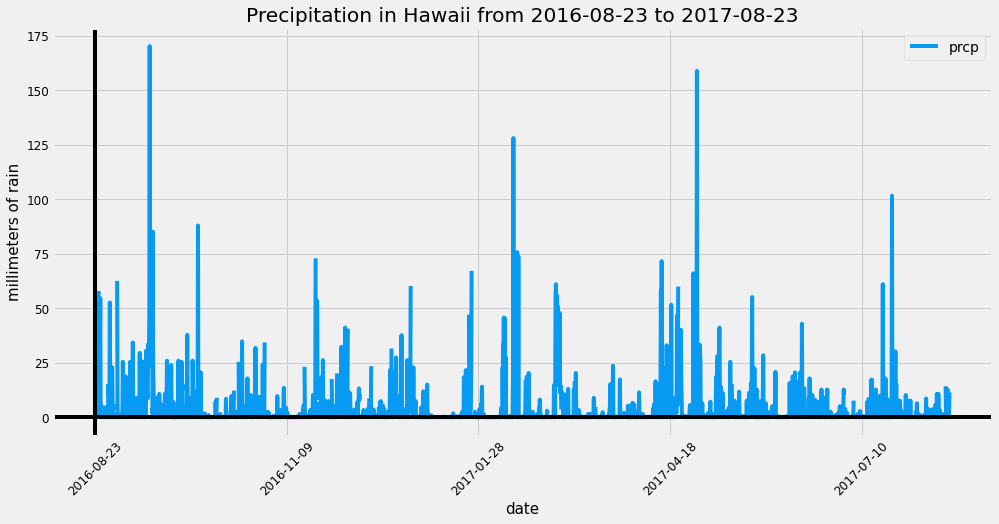

In [15]:
climate_df.plot(figsize=(15, 7),
    sort_columns=True, 
    rot=45, 
    use_index=True, 
    title=(f'Precipitation in Hawaii from {year_ago} to {last_date}'),
    legend=True,
    fontsize=12,
    grid=True,
    color='xkcd:azure')

plt.axvline(x=0.5, color="black")
plt.axhline(color="black")
plt.xlabel('date', fontsize=15)
plt.ylabel('millimeters of rain', fontsize=15)

plt.savefig(f'Precipitation in Hawaii from {year_ago} to {last_date}')
plt.show()

# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
number_of_stations = session.query(Station.name).count()
print(number_of_stations)

9


In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = engine.execute('SELECT station, COUNT(station) FROM Measurement GROUP BY station HAVING COUNT(*) > 1 ORDER BY count(station) desc')
for stations in most_active_stations:
    print(stations)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = engine.execute('SELECT min(tobs) FROM Measurement GROUP BY station HAVING COUNT(*) > 1 ORDER BY count(station) desc LIMIT 1')
for lowest in lowest_temp:
    print(lowest)

highest_temp = engine.execute('SELECT max(tobs) FROM Measurement GROUP BY station HAVING COUNT(*) > 1 ORDER BY count(station) desc LIMIT 1')
for highest in highest_temp:
    print(highest)
    
avg_temp = engine.execute('SELECT avg(tobs) FROM Measurement GROUP BY station HAVING COUNT(*) > 1 ORDER BY count(station) desc LIMIT 1')
for avg in avg_temp:
    print(avg)

(12.2,)
(29.4,)
(22.03582251082252,)


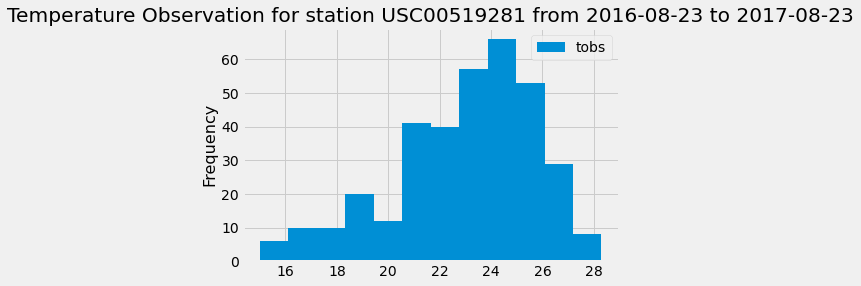

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_tobs = session.query(Measurement.tobs, Measurement.date).\
    filter(Measurement.station == "USC00519281", Measurement.date >=year_ago, Measurement.date <= last_date).all()

last_year_station_climate_df = pd.DataFrame(most_active_station_tobs, columns=['tobs','date']).sort_values(by='date')
last_year_station_climate_df.set_index('date', inplace=True)
last_year_station_climate_df.head(12)

tobs = [temp[0] for temp in most_active_station_tobs]

#plot using 12 bins
plt.hist(tobs, bins=12)
plt.title(f"Temperature Observation for station USC00519281 from {year_ago} to {last_date}")
plt.ylabel('Frequency', fontsize=16)
labels = ['tobs']

plt.legend(labels)

plt.savefig(f'Temperature Observation for station USC00519281 from {year_ago} to {last_date}')
plt.show()

# Close session

In [20]:
# Close Session
session.close()